### Análise Exploratória de Dados

Para essa etapa será realizada uma análise exploratória dos dados baseada nos dataframes construídos e transformados das ações negociadas na BOVESPA e NASDAQ/NYSE. A análise será realizada separadamente para cada um dos mercados.

A construção e transformação das bases pode ser consultada no notebook Basedados.ipynb

In [2]:
#bibliotecas necessárias para desenvolvimento
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, WeekdayLocator, DateFormatter, MONDAY
from datetime import date
#from IPython.core.interactiveshell import InteractiveShell #esse pacote permite mostrar múltiplos outputs para um único input
#InteractiveShell.ast_node_interactivity = "all"

### BOVESPA

BOVESPA é a Bolsa de Valores de São Paulo. É o lugar onde são negociadas ações de empresas brasileiras listadas em bolsa.

No Brasil, a Bovespa se uniu a BM&F (mercados futuros). Desse modo, o BM&FBovespa é resultado dessa junção. A partir da união com a Cetip, criou-se a B3 – Brasil, Bolsa e Balcão. 

A função da BM&FBovespa é implantar e desenvolver sistemas que negociam, compensam, registram, e liquidam valores mobiliários e ativos. O principal destaque, nesse caso, são as ações, derivativos, câmbio e outros ativos.

In [3]:
#importando a base de dados construída
df_b = pd.read_csv('df_b.csv')

#configurando a variável data para datetime e índice do df
df_b['data'] = pd.to_datetime(df_b['data']) 
df_b['data'] = df_b['data'].dt.strftime('%Y-%m-%d')
df_b = df_b.set_index('data')

In [4]:
#overview do início e fim da base
df_b.head(4)
df_b.tail(4)

,ALPA4.SA,ABEV3.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
data,,,,,,,,,,,,,,,,,,,,,
2022-09-26,-0.011249,-0.006527,-0.002856,-0.040461,-0.039609,-0.037795,-0.021851,-0.007580,-0.022652,-0.018073,...,-0.020227,-0.025022,-0.046729,-0.038077,-0.047083,0.002185,-0.042689,-0.033492,0.000000,-0.037124
2022-09-27,-0.049628,0.011071,-0.028432,0.001934,-0.009368,0.016165,-0.012155,0.004338,-0.007458,-0.006098,...,-0.015938,-0.015319,0.017911,-0.010793,-0.008299,-0.014954,-0.041341,-0.035809,-0.017157,-0.036984
2022-09-28,-0.004289,0.017972,0.008790,0.017869,0.007813,-0.004383,-0.043928,0.012903,0.003736,0.000509,...,0.007142,0.025404,0.016569,-0.010911,-0.001390,0.009409,0.019293,0.005195,0.008945,0.107791
2022-09-29,-0.027107,-0.007022,-0.076984,-0.092027,-0.019647,-0.004402,-0.030772,-0.018329,0.010510,0.007612,...,-0.009369,0.000000,-0.022154,-0.021323,-0.026781,0.001316,-0.065813,-0.032771,-0.005954,-0.034412


In [5]:
# descrição das variáveis
df_b.describe()

,ALPA4.SA,ABEV3.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,...,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.000404,-0.000037,-0.001059,-0.000994,0.000331,0.001316,-0.000069,-0.000410,-0.000344,-0.000264,...,-0.000040,-0.000017,0.001180,-0.000915,-0.000357,0.000314,-0.000429,-0.000469,0.001301,-0.000639
std,0.030690,0.021191,0.041358,0.047575,0.027049,0.044940,0.019115,0.028822,0.023814,0.024105,...,0.018187,0.020820,0.028150,0.032064,0.034119,0.027612,0.044220,0.026774,0.025876,0.036603
min,-0.233994,-0.171759,-0.185997,-0.459937,-0.175787,-0.410084,-0.099906,-0.272886,-0.154898,-0.154019,...,-0.131920,-0.159900,-0.166569,-0.240265,-0.238674,-0.281822,-0.378834,-0.165973,-0.230921,-0.290010
25%,-0.013976,-0.011100,-0.024367,-0.019766,-0.015190,-0.019052,-0.010089,-0.013949,-0.012844,-0.012467,...,-0.009101,-0.010971,-0.013168,-0.016577,-0.017508,-0.013779,-0.024537,-0.015062,-0.011841,-0.020375
50%,0.000000,0.000000,-0.003527,-0.000778,-0.000190,-0.002061,0.000807,-0.001137,0.000000,-0.000536,...,0.000000,-0.000776,0.001721,-0.001494,-0.001287,0.000000,0.000000,-0.000181,0.001116,-0.001286
75%,0.014845,0.010530,0.020632,0.018082,0.014971,0.018557,0.010261,0.013621,0.011833,0.012378,...,0.008411,0.010868,0.016390,0.014485,0.016615,0.013729,0.021659,0.012954,0.014909,0.018349
max,0.254025,0.094139,0.242125,0.261392,0.176007,0.380464,0.102158,0.142900,0.151240,0.155866,...,0.116196,0.094975,0.180650,0.210112,0.193863,0.193574,0.193050,0.139489,0.130102,0.207496


Nossa base de dados da BOVESPA contém as informações de preços finais transformados para cerca de 80 ações diferentes. 

As datas vão de 02/01/2019 a 29/09/2022 e não incluem fins de semana e feriados nacionais. A escolha do período em questão se deu pela pandemia de COVID-19, decretada em Março/2020 no Brasil. Sendo assim, supostamente teríamos um período pré-pandêmico de normalidade, o momento de crise aguda e um período tardio da crise, que não pode ser denominado pós-pandêmico pois não foi decretado o fim da pandemia a nível mundial até a atualidade.

Neste momento, o interesse inicial é entender como foi o desempenho do mercado de ações nacionais durante esse período. Dessa forma, vamos focar numa visualização temporal que pode nos mostrar o comportamento dos dados, possíveis crises na Bolsa e períodos interessantes para a futura comparação de correlações desses ativos.

In [6]:
#pegando os preços transformados médios por dia 
df_b_media = []

for i in df_b.index:
    df_b_media.append(df_b.loc[i].mean())

In [7]:
dates_b = df_b.index
values_b = df_b_media

In [8]:
#formatação de data
anos_b = YearLocator()
meses_b = MonthLocator(range(1,13), bymonthday=1, interval=3)
anosFmt_b = DateFormatter('%Y')
mesesFmt_b = DateFormatter("%b '%y")

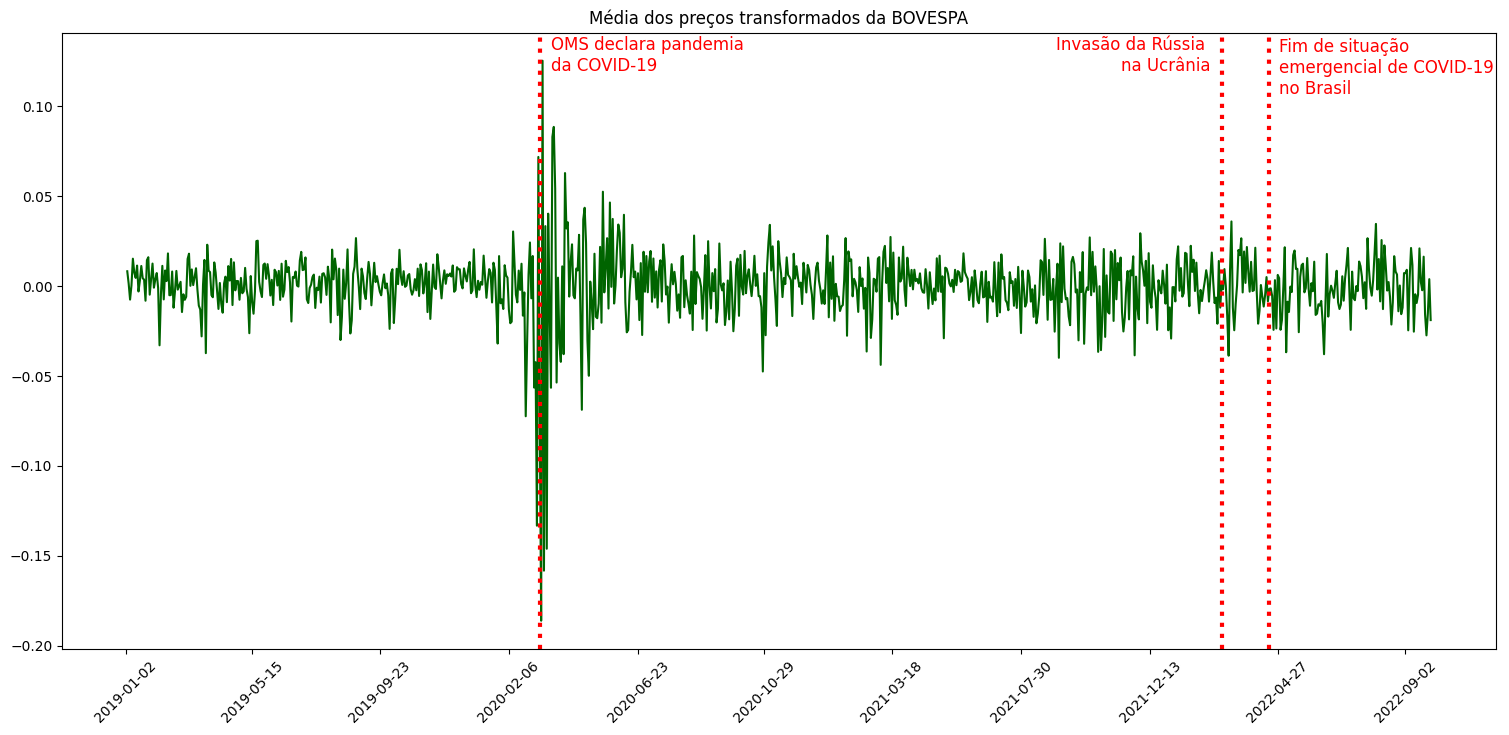

In [9]:
#plot do gráfico de preços médios transformados no período
fig, ax = plt.subplots()
plt.title("Média dos preços transformados da BOVESPA")
fig.set_size_inches(18.5, 8)
ax.plot_date(dates_b, values_b, '-', color = 'darkgreen')
ax.xaxis.set_major_locator(meses_b)
plt.axvline(x = '2020-03-11',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2020-03-23', y = 0.12, s = "OMS declara pandemia \nda COVID-19", color = 'red', size = 12)
plt.axvline(x = '2022-04-18',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2022-04-28', y = 0.107, s = "Fim de situação \nemergencial de COVID-19 \nno Brasil", color = 'red', size = 12)
plt.axvline(x = '2022-02-24',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2022-02-14', y = 0.12, s = "Invasão da Rússia \nna Ucrânia", color = 'red', size = 12, horizontalalignment = 'right')
plt.xticks(rotation=45)
ax.autoscale_view()

No geral, os dados orbitam em zero, o que faz sentido, visto que enquanto algumas ações valorizam, outras desvalorizam e muitas seguem neutras. É possível notar que os períodos de crise possuem variabilidade muito maior do que os tempos de normalidade.

Os primeiros indícios de crise por conta da pandemia de COVID-19 se dão entre o final de 2019 e início de 2020, quando os primeiros casos da doença começaram a surgir na China e no restante do mundo. Logo em seguida, em Março/2020, a OMS decreta situação pandêmica no Brasil e pode-se notar o pico da crise no mercado financeiro nacional.

Essa crise se estende mas em meados de 2021 podemos notar um comportamento mais similar à 2019. Iremos investigar essa similaridade na próxima visualização.

É importante incluir um outro evento histórico importante deste período: A guerra Rússia vs Ucrânia, que se estende em conflitos desde 2014, mas consideramos o "início" no momento de invasão da Ucrânia, em Fevereiro/2022. 

A partir desse gráfico surgiu o interesse de comparar períodos isolados de diferentes anos, então selecionamos o mês de março, pois Março/2019 representa normalidade pré-pandemia, Março/2020 pico da crise, Março/2021 um outro momento de crise supostamente mais similar à normalidade e Março/2022, um momento mais distante da crise da pandemia mas mais próximo da crise causada pela guerra. 

Será elaborado um violin plot dos quatro períodos para que possamos analisar as distribuições e as variabilidades dos preços transformados das ações.

In [10]:
#selecionando as os preços médios transformados de cada ação nos meses de março
df_b_mar2019 = df_b.loc[(df_b.index >= '2019-03-01')
                     & (df_b.index <= '2019-03-31')]

medias_mar2019 = df_b_mar2019.mean()

df_b_mar2020 = df_b.loc[(df_b.index >= '2020-03-01')
                     & (df_b.index <= '2020-03-31')]

medias_mar2020 = df_b_mar2020.mean()

df_b_mar2021 = df_b.loc[(df_b.index >= '2021-03-01')
                     & (df_b.index <= '2021-03-31')]

medias_mar2021 = df_b_mar2021.mean()

df_b_mar2022 = df_b.loc[(df_b.index >= '2022-03-01')
                     & (df_b.index <= '2022-03-31')]

medias_mar2022 = df_b_mar2022.mean()

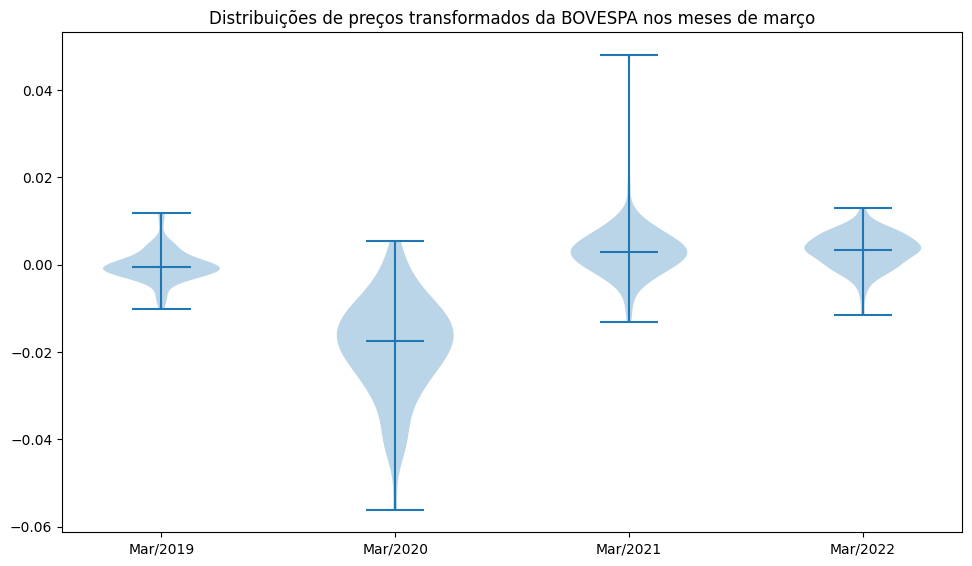

In [11]:
#combinando as listas em uma lista
data_to_plot = [medias_mar2019, medias_mar2020, medias_mar2021, medias_mar2022]

#violin plot
fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_axes([0,0,1,1])
ax.set_title('Distribuições de preços transformados da BOVESPA nos meses de março')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["Mar/2019", "Mar/2020", "Mar/2021", "Mar/2022"])
bp = ax.violinplot(data_to_plot, showmedians=True)
plt.show()

Aqui é possível notarmos que durante a normalidade da Bolsa, em Março/2019, os preços de ações não variam muito, e centram em zero com alta densidade. Já no pico da crise, em Março/2020, é evidente a alta desvalorização das ações nacionais, com a esmagadora parcela dos preços abaixo de zero e uma mediana centrada em -0.02. 

Em Mar/2021 o cenário muda e temos valorização do mercado de ações. Essa alta se dá por vários motivos, entre eles:

* Reabertura de setores afetados pela pandemia em 2020;
* Início das campanhas de vacinação;
* Flexibilização das medidas de quarentena;
* etc.

Já em Mar/2022 essa alta se controla e podemos observar o movimento de volta à normalidade, uma vez que o Brasil não é muito impactado diretamente pela guerra nesse período.

### NASDAQ/NYSE

Atualmente, a NYSE (*New York Stock Exchange*) é considerada a maior bolsa de valores do mundo. Criada em 1792, a bolsa norte-americana está situada na ilha de Manhattan, em Nova York.

Para se ter ideia da sua importância, o seu valor de mercado, ou seja, o valor das empresas listadas na NYSE, somam US$ 21 trilhões. As maiores empresas do mundo estão listadas na NYSE, tornando-a um dos principais termômetros do mercado financeiro global. Ou seja, o desempenho da *New York Stock Exchange* afeta diretamente as outras bolsas de valores pelo mundo.

NASDAQ é a abreviação de “*National Association of Securities Dealers Automated Quotations*”. Ela é a segunda maior bolsa de valores do mundo depois da NYSE, e abriga gigantes da tecnologia como Apple, Google e Amazon. O valor das empresas listadas da NASDAQ somam US$ 7 trilhões.

In [12]:
#importando a base de dados construída
df_ny = pd.read_csv('df_ny.csv')

#configurando a variável data para datetime e índice do df
df_ny['data'] = pd.to_datetime(df_ny['data'])
df_ny['data'] = df_ny['data'].dt.strftime('%Y-%m-%d')
df_ny = df_ny.set_index('data')

In [13]:
#overview do início e fim da base
df_ny.head(4)
df_ny.tail(4)

,DDD,MMM,EGHT,AOS,ATEN,AIR,ABB,ABT,ABBV,ANF,...,ZG,ZION,ZIONL,ZIONO,ZIONP,ZKIN,ZS,ZUMZ,ZYNE,ZYXI
data,,,,,,,,,,,,,,,,,,,,,
2022-09-26,-0.012579,0.000089,-0.010840,-0.008464,-0.017068,-0.009676,-0.014861,-0.008378,-0.013016,-0.022287,...,-0.009182,-0.018325,0.000390,-0.000796,0.001539,-0.002413,0.006720,-0.009644,-0.059189,0.031674
2022-09-27,0.037271,-0.005235,-0.013718,-0.001620,0.033849,0.001143,0.003540,-0.015240,0.003605,0.031688,...,-0.006856,-0.014489,-0.010582,-0.000797,-0.004178,-0.025689,0.021365,0.013294,0.035932,0.040730
2022-09-28,0.058039,0.016499,0.008253,0.022450,0.025393,0.025661,0.032068,0.003958,0.020118,0.033132,...,0.025808,0.009620,0.000394,0.006354,0.002127,0.062445,0.033558,0.040166,0.011696,0.061277
2022-09-29,-0.031563,-0.017478,-0.047695,-0.034688,-0.010378,-0.004185,-0.013397,-0.004365,-0.013087,-0.071280,...,-0.019293,-0.028369,0.007455,-0.007550,0.000000,0.011574,-0.017271,-0.032003,-0.095078,-0.023208


In [14]:
# descrição das variaveis
df_ny.describe()

,DDD,MMM,EGHT,AOS,ATEN,AIR,ABB,ABT,ABBV,ANF,...,ZG,ZION,ZIONL,ZIONO,ZIONP,ZKIN,ZS,ZUMZ,ZYNE,ZYXI
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,-0.000229,-0.000563,-0.001730,0.000121,0.000819,-0.000049,0.000331,0.000368,0.000498,-0.000309,...,-0.000039,0.000233,-0.000107,-0.000017,-0.000132,-0.000627,0.001513,0.000128,-0.001654,0.001348
std,0.053136,0.017798,0.039425,0.019429,0.032195,0.038020,0.018376,0.017461,0.017206,0.041368,...,0.040760,0.026012,0.012246,0.016818,0.022018,0.057095,0.038447,0.034190,0.057980,0.046271
min,-0.218706,-0.138631,-0.306467,-0.095198,-0.196873,-0.411801,-0.130132,-0.102982,-0.177363,-0.336622,...,-0.261951,-0.128362,-0.135290,-0.217466,-0.294928,-0.208055,-0.215261,-0.151172,-0.663024,-0.260845
25%,-0.024709,-0.008474,-0.018202,-0.010140,-0.013746,-0.013716,-0.008620,-0.007672,-0.007327,-0.020196,...,-0.020290,-0.014001,-0.003203,-0.004020,-0.004961,-0.028573,-0.016726,-0.020073,-0.027493,-0.021874
50%,-0.000940,0.000113,-0.000497,0.000888,0.001367,0.000198,0.001076,0.001047,0.001254,0.002681,...,0.001478,0.000605,0.000000,0.000000,0.000000,-0.003160,0.003201,-0.000959,-0.003839,0.000000
75%,0.022862,0.008265,0.016196,0.011251,0.015744,0.014413,0.009966,0.009181,0.008830,0.022326,...,0.022799,0.013420,0.003189,0.004335,0.005082,0.026877,0.020700,0.019190,0.022818,0.025338
max,0.714275,0.118659,0.297856,0.095522,0.299703,0.310720,0.125163,0.103783,0.083582,0.185439,...,0.220516,0.214152,0.122917,0.244392,0.272771,0.314319,0.257787,0.162863,0.400499,0.214766


Essa base é muito mais robusta do que a base anterior, contando com mais de 4700 ações internacionais, originárias principalmente dos EUA e Europa.

Neste momento, nosso interesse é replicar a visualização feita na primeira metade da análise, levando em consideração as diferenças socioculturais e históricas atreladas a cada caso. 

In [15]:
#pegando os preços transformados médios por dia 
df_ny_media = []

for i in df_ny.index:
    df_ny_media.append(df_ny.loc[i].mean())

In [16]:
dates_ny = df_ny.index
values_ny = df_ny_media

In [17]:
#formatação de data
anos_ny = YearLocator()
meses_ny = MonthLocator(range(1,13), bymonthday=1, interval=3)
anosFmt_ny = DateFormatter('%Y')
mesesFmt_ny = DateFormatter("%b '%y")

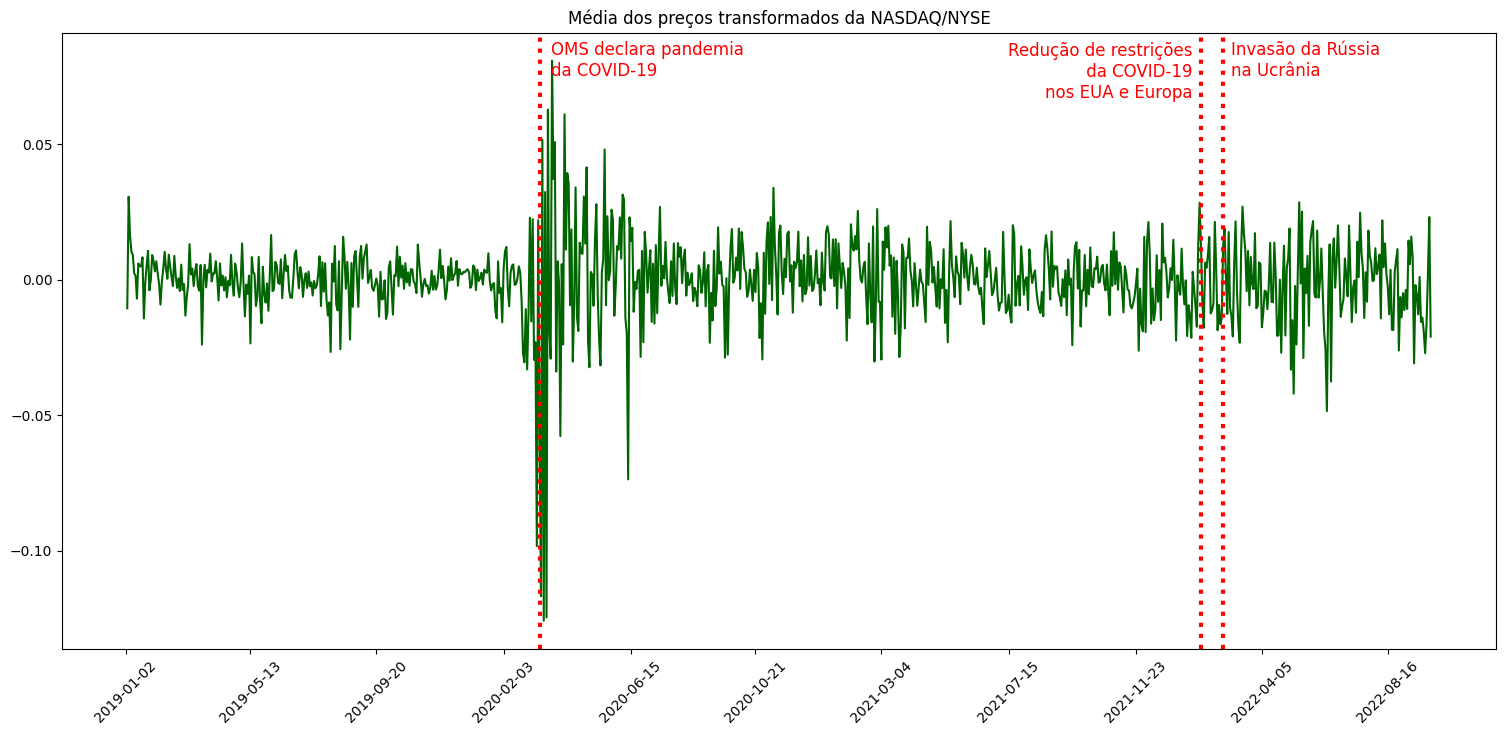

In [18]:
#plot do gráfico de preços médios transformados no período
fig, ax = plt.subplots()
plt.title("Média dos preços transformados da NASDAQ/NYSE")
fig.set_size_inches(18.5, 8)
ax.plot_date(dates_ny, values_ny, '-', color = 'darkgreen')
ax.xaxis.set_major_locator(meses_ny)
plt.axvline(x = '2020-03-11',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2020-03-23', y = 0.075, s = "OMS declara pandemia\nda COVID-19", color = 'red', size = 12)
plt.axvline(x = '2022-02-01',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2022-01-24', y = 0.067, s = "Redução de restrições\n da COVID-19\nnos EUA e Europa", color = 'red', size = 12, horizontalalignment = 'right')
plt.axvline(x = '2022-02-24',color="red",linestyle='dotted',linewidth=3)
plt.text(x = '2022-03-04', y = 0.075, s = "Invasão da Rússia\nna Ucrânia", color = 'red', size = 12, horizontalalignment = 'left')
plt.xticks(rotation=45)
ax.autoscale_view()

A primeira vista, esse gráfico parece muito mais caótico do que o observado na BOVESPA, mas boa parte desse caos é justificado pela maior quantidade de ações representadas na base.

Aqui, nota-se também que os valores inicialmente orbitam em zero, até final de 2021, no surgimento da COVID-19. O mercado se abala e a crise perdura por muito tempo. 

No início de Fev/2022 temos a flexibilização das restrições de combate à pandemia nos EUA e Europa, seguido da invasão na Ucrânia, que abalou o mercado internacional muito mais do que o observado no Brasil anteriormente.

Nesse ponto, é possível suspeitarmos que o mercado internacional está mais distante da "normalidade" observada em 2019 do que o Brasil.

In [19]:
#selecionando as os preços médios transformados de cada ação nos meses de março
df_ny_mar2019 = df_ny.loc[(df_ny.index >= '2019-03-01')
                     & (df_ny.index <= '2019-03-31')]

medias_mar2019 = df_ny_mar2019.mean()

df_ny_mar2020 = df_ny.loc[(df_ny.index >= '2020-03-01')
                     & (df_ny.index <= '2020-03-31')]

medias_mar2020 = df_ny_mar2020.mean()

df_ny_mar2021 = df_ny.loc[(df_ny.index >= '2021-03-01')
                     & (df_ny.index <= '2021-03-31')]

medias_mar2021 = df_ny_mar2021.mean()

df_ny_mar2022 = df_ny.loc[(df_ny.index >= '2022-03-01')
                     & (df_ny.index <= '2022-03-31')]

medias_mar2022 = df_ny_mar2022.mean()

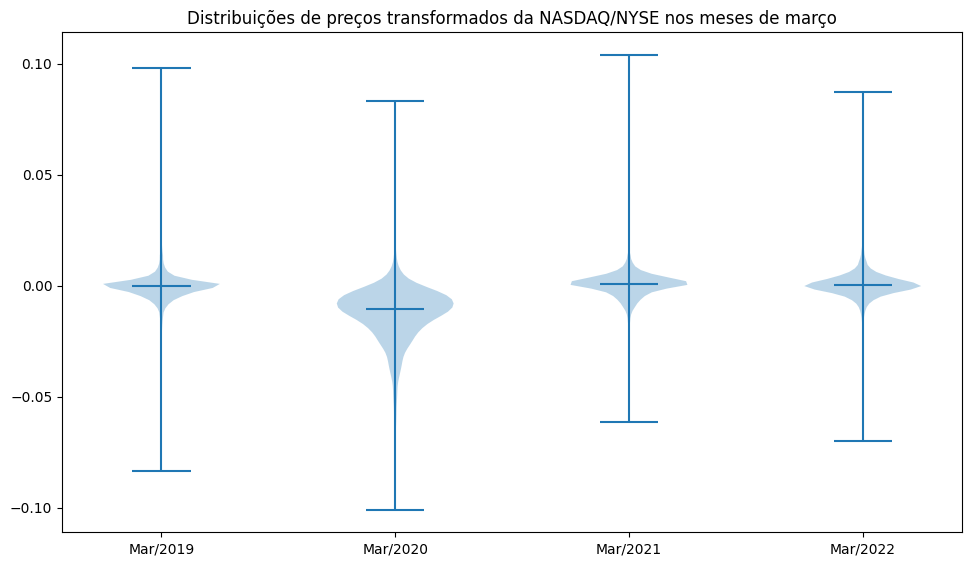

In [20]:
#combinando as listas em uma lista
data_to_plot = [medias_mar2019, medias_mar2020, medias_mar2021, medias_mar2022]

#violin plot
fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_axes([0,0,1,1])
ax.set_title('Distribuições de preços transformados da NASDAQ/NYSE nos meses de março')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["Mar/2019", "Mar/2020", "Mar/2021", "Mar/2022"])
bp = ax.violinplot(data_to_plot, showmedians=True)
plt.show()

Na comparação dos meses de março é interessante observarmos que em 2019 a variabilidade e volatilidade do mercado internacional são muito maiores do que no Brasil.

Os padrões de desvalorização (Mar/2020), alta do mercado (Mar/2021) e "volta à normalidade" (Mar/2022) se repetem aqui, de maneira mais suave.

### Referências bibliográficas

* [Bovespa: entenda sobre o funcionamento na bolsa brasileira](https://fiis.com.br/artigos/bovespa/)
* [Organização Mundial de Saúde declara pandemia do novo Coronavírus](https://www.unasus.gov.br/noticia/organizacao-mundial-de-saude-declara-pandemia-de-coronavirus)
* [Brasil decreta fim de situação de emergência por COVID-19 no país](https://www.em.com.br/app/noticia/nacional/2022/04/17/interna_nacional,1360611/brasil-decreta-fim-de-situacao-de-emergencia-por-covid-19-no-pais.shtml)
* [Cronologia da invasão da Ucrânia pela Rússia em 2022](https://pt.wikipedia.org/wiki/Cronologia_da_invas%C3%A3o_da_Ucr%C3%A2nia_pela_R%C3%BAssia_em_2022)
* [Apesar da ômicron, países europeus suspendem restrições contra a covid-19](https://noticias.uol.com.br/internacional/ultimas-noticias/2022/01/27/situacao-covid-19-paises-europa.htm)
* [Covid-19: Embalados pela redução de casos, EUA e Europa reduzem restrições](https://www.correiobraziliense.com.br/mundo/2022/02/4984027-covid-19-embalados-pela-reducao-de-casos-eua-e-europa-reduzem-restricoes.html)
* [NYSE: o que é e qual a sua importância](https://capitalresearch.com.br/blog/nyse/)
* [O que é Nasdaq, como funciona e o que influencia seu índice?](https://exame.com/invest/guia/o-que-e-nasdaq-como-funciona-e-o-que-influencia-seu-indice/)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import minimum_spanning_tree 
import warnings
warnings.filterwarnings('ignore')

In [22]:
#craetes a correlation matrix
cor_matrix_mar2020 = df_ny_mar2020.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_mar2020.head()

,MMM,EGHT,AOS,ATEN,AIR,ABB,ABT,ABBV,ANF,AGD,...,ZG,ZION,ZIONL,ZIONO,ZIONP,ZKIN,ZS,ZUMZ,ZYNE,ZYXI
MMM,1.000000,0.664157,0.738697,0.417828,0.342786,0.792504,0.897022,0.787904,0.603310,0.547551,...,0.469663,0.816762,-0.105991,0.493713,0.077472,0.182720,0.508285,0.563610,0.369882,0.560494
EGHT,0.664157,1.000000,0.444754,0.469548,0.366845,0.681853,0.455799,0.498693,0.649383,0.547399,...,0.594408,0.601262,0.280693,0.601600,0.113494,-0.147011,0.488299,0.712473,0.367591,0.453520
AOS,0.738697,0.444754,1.000000,0.310945,0.207271,0.532446,0.807740,0.687829,0.386701,0.480193,...,0.490707,0.699546,0.176972,0.084377,-0.017567,0.270138,0.416441,0.205813,0.303441,0.628742
ATEN,0.417828,0.469548,0.310945,1.000000,0.670670,0.530494,0.200383,0.484960,0.565220,0.477874,...,0.651637,0.507396,0.260823,0.448719,-0.044752,0.204996,0.453241,0.497682,0.746268,0.481895
AIR,0.342786,0.366845,0.207271,0.670670,1.000000,0.622775,0.226035,0.505765,0.654463,0.764858,...,0.731163,0.405812,0.083083,0.575541,0.516807,0.312591,0.196110,0.472500,0.609350,0.481728


In [23]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_mar2020 = cor_matrix_mar2020.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_mar2020 = np.asmatrix(cor_matrix_mar2020)

In [24]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix_mar2020)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks_mar2020[x])

#shows the edges with their corresponding weights
#G.edges(data=True)

In [25]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    #plt.savefig("part1.png", format="PNG")
    plt.show() 

create_corr_network_1(G)

KeyboardInterrupt: 

In [26]:
df_b_mar2020 = df_b.loc[(df_b.index >= '2020-03-01')
                     & (df_b.index <= '2020-03-31')]

df_b_mar2020

,ALPA4.SA,ABEV3.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
data,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.029983,0.012304,0.019124,0.016736,0.040822,0.012148,-0.007880,0.024782,0.011658,0.013340,...,0.056015,0.028722,0.043674,0.032993,0.036062,0.045227,0.037660,0.015587,0.085252,-0.034706
2020-03-03,0.018595,0.001358,0.048677,-0.026686,-0.007831,-0.038036,-0.031177,-0.012617,-0.016801,-0.026860,...,0.009681,-0.007862,-0.012070,0.013098,-0.021481,-0.000216,0.002090,-0.009475,0.019598,0.018973
2020-03-04,0.010814,0.037941,0.030649,0.016902,0.003622,0.003415,0.013297,0.026254,0.007705,0.010897,...,0.033535,0.043369,0.009641,-0.001503,0.067625,0.046785,0.041573,0.009098,0.011206,-0.020970
2020-03-05,-0.073120,-0.005239,-0.095237,-0.156948,-0.055329,-0.073060,-0.019519,-0.069498,-0.030052,-0.033392,...,-0.027963,-0.028304,-0.062738,-0.097317,-0.054443,-0.036055,-0.070520,-0.053879,-0.036995,-0.070822
2020-03-06,-0.006126,0.005892,-0.102780,0.011179,-0.013463,0.021766,0.001313,-0.053822,-0.032150,-0.028938,...,-0.020324,-0.024827,-0.067863,-0.051002,-0.065174,-0.048993,-0.188645,-0.019301,-0.059100,-0.043867
2020-03-09,-0.190375,-0.043355,-0.133074,-0.186467,-0.127892,-0.215399,-0.071034,-0.080431,-0.103159,-0.074727,...,-0.070894,-0.076422,-0.107519,-0.109893,-0.175988,-0.164856,-0.187873,-0.103873,-0.102034,-0.106856
2020-03-10,0.123505,-0.017188,0.108968,0.119651,0.117511,0.033555,0.021259,0.031275,0.028482,0.023820,...,0.116196,0.026128,0.065695,0.148666,0.075838,0.169329,0.193050,0.093671,0.052915,0.116007
2020-03-11,-0.036265,-0.047577,-0.058681,-0.179010,-0.077962,-0.068276,-0.042979,-0.135433,-0.082526,-0.084374,...,-0.019055,0.012176,-0.059201,-0.070072,-0.091106,-0.095221,-0.054832,-0.071839,-0.066848,-0.060916
2020-03-12,-0.154390,-0.171759,-0.185997,-0.398875,-0.142739,-0.410084,-0.097076,-0.099325,-0.136331,-0.143932,...,-0.071036,-0.159900,-0.135724,-0.238711,-0.149036,-0.141912,-0.257829,-0.165973,-0.172169,-0.145920


In [27]:
#craetes a correlation matrix
cor_matrix_b_mar2020 = df_b_mar2020.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix_b_mar2020.head()

,ABEV3.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,...,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VBBR3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.000000,0.572554,0.794314,0.646572,0.788753,0.573955,0.680051,0.731813,0.731917,0.556037,...,0.545707,0.822861,0.611594,0.815571,0.620344,0.598416,0.597274,0.730756,0.737945,0.663290
AMER3.SA,0.572554,1.000000,0.659807,0.882576,0.840426,0.779003,0.570252,0.876733,0.850600,0.827821,...,0.560182,0.606789,0.784487,0.806096,0.737926,0.879419,0.726449,0.781992,0.580232,0.477048
AZUL4.SA,0.794314,0.659807,1.000000,0.821649,0.746042,0.502181,0.821420,0.754565,0.770968,0.660245,...,0.443277,0.608359,0.818636,0.818819,0.756519,0.697565,0.845258,0.851169,0.867420,0.690426
B3SA3.SA,0.646572,0.882576,0.821649,1.000000,0.795534,0.792082,0.744357,0.922964,0.900555,0.844800,...,0.629272,0.639498,0.801755,0.878667,0.783132,0.886867,0.822084,0.899290,0.710419,0.663505
BPAN4.SA,0.788753,0.840426,0.746042,0.795534,1.000000,0.715564,0.515263,0.836494,0.794386,0.755879,...,0.491336,0.672849,0.724589,0.819976,0.739056,0.803622,0.660499,0.774747,0.619348,0.471001


In [28]:
#extracts the indices from the correlation matrix, which are the stocks
stocks_b_mar2020 = cor_matrix_b_mar2020.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix_b_mar2020 = np.asmatrix(cor_matrix_b_mar2020)

In [29]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix_b_mar2020)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks_b_mar2020[x])

#shows the edges with their corresponding weights
#G.edges(data=True)[:5]

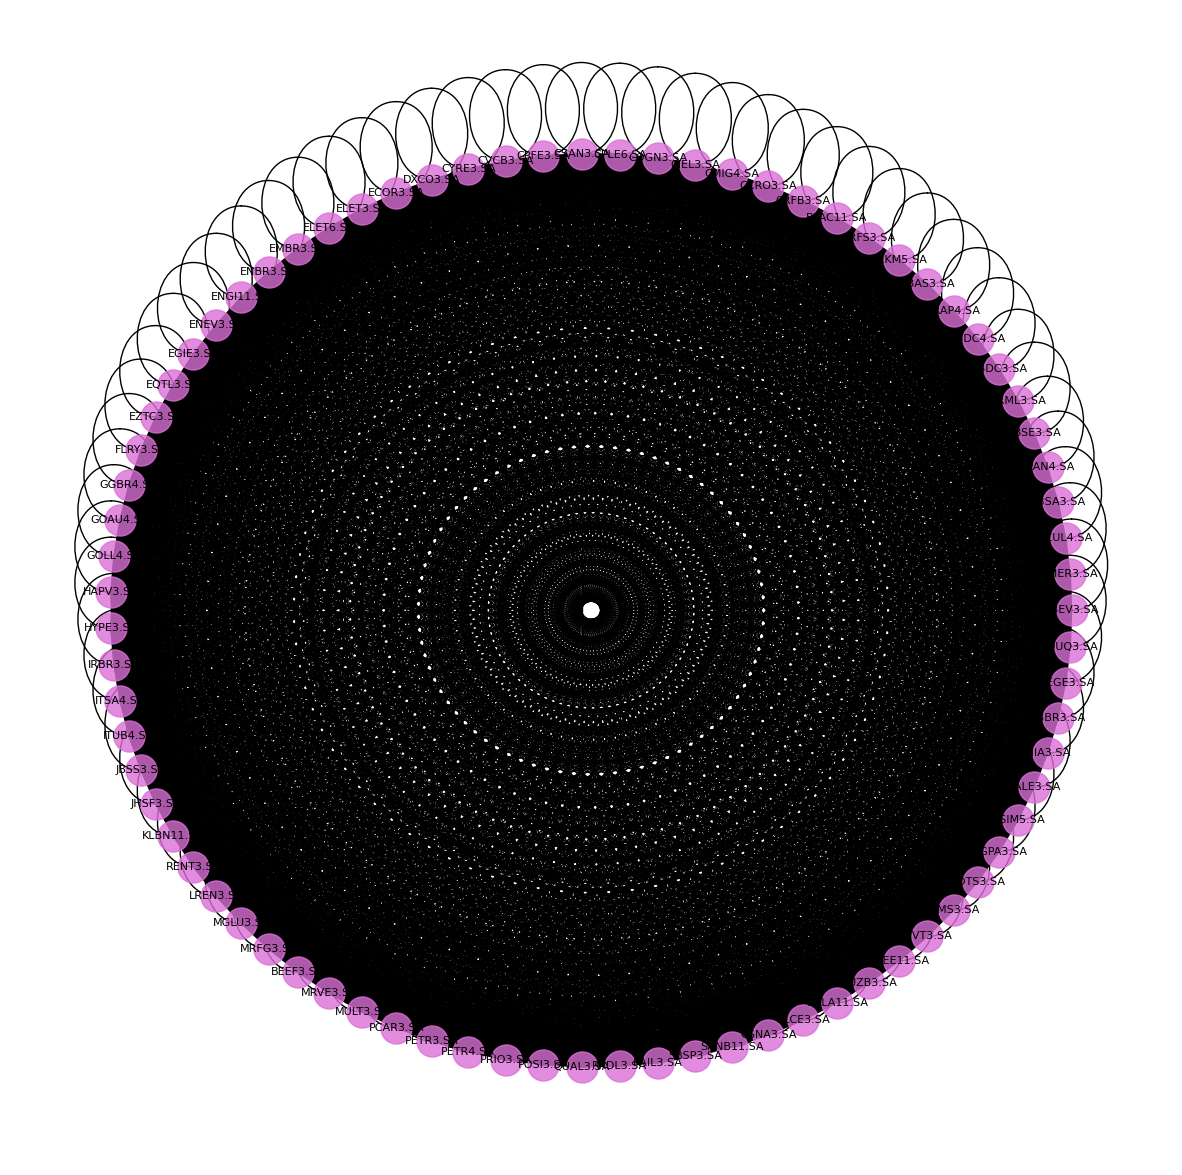

In [30]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    #plt.savefig("part1.png", format="PNG")
    plt.show() 

create_corr_network_1(G)

In [31]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d.items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 

In [32]:
create_corr_network_5(G, corr_direction="positive", min_correlation = 0.7)

AttributeError: 'DegreeView' object has no attribute 'items'

In [37]:
T = minimum_spanning_tree(G)

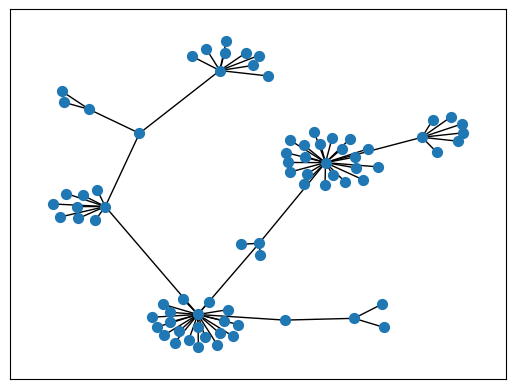

In [45]:
plt.figure()
nx.draw_networkx(T, with_labels=False, node_size = 50)
plt.show()

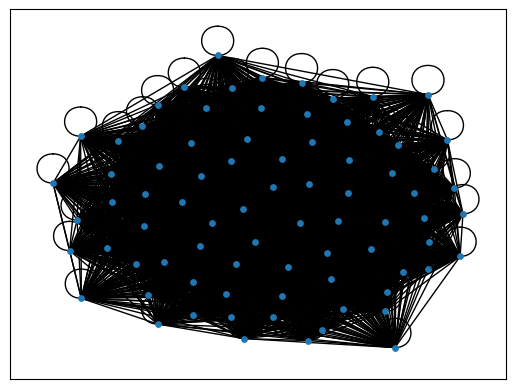

In [43]:
plt.figure()
nx.draw_networkx(G, with_labels=False, node_size = 15)
plt.show()